In [3]:
!pip install --user mlxtend

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [5]:
# load dataset
book=pd.read_csv('/content/book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [7]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [9]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB



### **Data preprocessing not required as it is already in transaction format**

# Apriori Algorithom

1) Association rules with 10% support and 70% confidence

In [10]:
## With 10% support
frequent_items=apriori(book,min_support=0.1,use_colnames=True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [11]:
# With 70% confidence
rules=association_rules(frequent_items,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


1. A leverage value of 0 indicates independence.
2. Range will be A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [12]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


In [13]:
# Lift ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


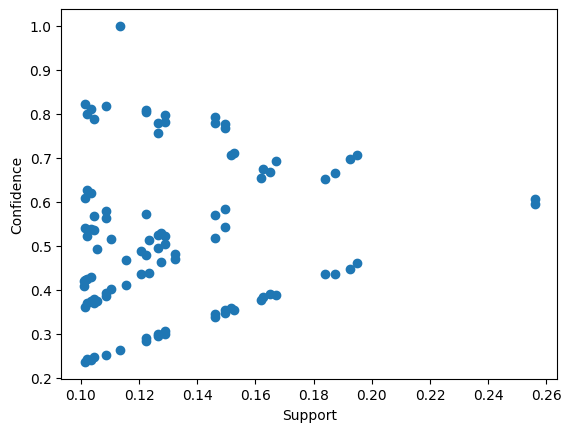

In [14]:
# Visualization of obtained rules
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### **2)Association rules with 20% Support and 60% confidence**

In [15]:
frequent_itemset=apriori(book,min_support=0.2,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [16]:
rules2=association_rules(frequent_itemset,metric='lift',min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


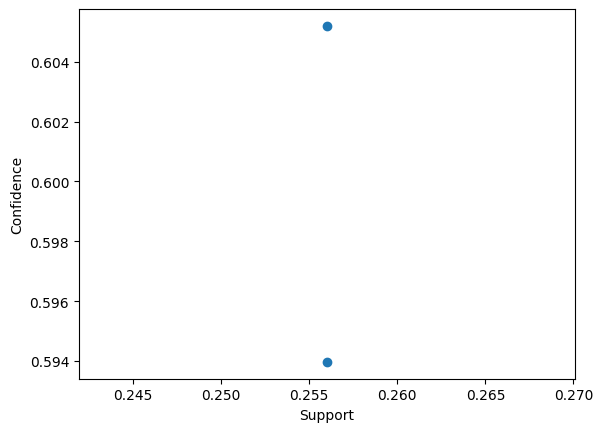

In [17]:
# Visualization of obtained rules
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


### **3) Association rules with 5% Support and 80% confidence**

In [19]:
frequent_itemset2=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemset2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, GeogBks, YouthBks, ArtBks)"
97,0.0650,"(CookBks, DoItYBks, ArtBks, GeogBks)"
98,0.0510,"(YouthBks, DoItYBks, CookBks, GeogBks, ChildBks)"


In [20]:
rules3=association_rules(frequent_itemset2,min_threshold=0.8,metric='lift')
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(CookBks, GeogBks, ChildBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
658,(ArtBks),"(CookBks, DoItYBks, ChildBks, GeogBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
659,(CookBks),"(DoItYBks, ChildBks, ArtBks, GeogBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
660,(GeogBks),"(CookBks, DoItYBks, ChildBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923


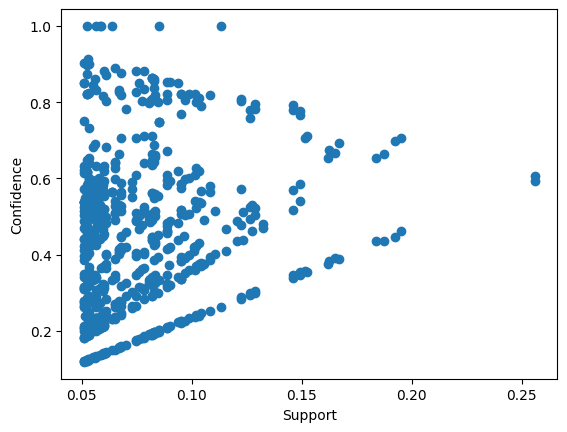

In [21]:
# Visualization of obtained rules
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()